**ML BATCH 1**

**Assignment :**

to study and implement Decision Tree

**Research Paper :**
Covid Symptom Severity Using Decision Tree

N. Rochmawati et al., "Covid Symptom Severity Using Decision Tree," 2020 Third International Conference on Vocational Education and Electrical Engineering (ICVEE), Surabaya, Indonesia, 2020, pp. 1-5, doi: 10.1109/ICVEE50212.2020.9243246.

**Name :**

Omkar Awari 202101070094

Girish Amrutkar 202101070103

Piyush Girase 202101070111

## **Research Paper**

https://drive.google.com/file/d/10mz4d8Wk37YfqAO4nYQIZd_QTzg-Asqp/view?usp=sharing

Based on the document, the research focused on using decision tree algorithms, specifically J48 and Hoeffding Tree, to classify Covid-19 symptoms and determine infection levels.

 The study used a clinical symptom dataset and compared the performance of the two algorithms.

  The results showed that J48 had slightly better accuracy, precision, and recall, while the Hoeffding Tree had a simpler tree view with fewer nodes.
  
   The study also mentioned related research on decision trees in fields such as power quality disturbance, heart disease classification, network intrusion detection, and Covid-19 mortality risk prediction.
   
  The research method involved dataset preparation, preprocessing, setting test data through cross-validation, implementing the classifiers, and comparing the results.
    
  The difference in results between the two algorithms was found to be not significant across different levels of cross-validation folds.
    
  The document concluded by suggesting future research with variations in preprocessing and cross-validation.

## **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **Importing the Dataset**

In [ ]:
import pandas as pd
import numpy as np

# data visualization library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'
covid=pd.read_csv("/content/drive/MyDrive/DataSets/covid.csv")
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [ ]:
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
covid.dtypes

Breathing Problem                          object
Fever                                      object
Dry Cough                                  object
Sore throat                                object
Running Nose                               object
Asthma                                     object
Chronic Lung Disease                       object
Headache                                   object
Heart Disease                              object
Diabetes                                   object
Hyper Tension                              object
Fatigue                                    object
Gastrointestinal                           object
Abroad travel                              object
Contact with COVID Patient                 object
Attended Large Gathering                   object
Visited Public Exposed Places              object
Family working in Public Exposed Places    object
Wearing Masks                              object
Sanitization from Market                   object


In [ ]:
covid.shape

(5434, 21)

In [ ]:
covid.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [ ]:
covid.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [ ]:
# create a table with data missing
missing_values=covid.isnull().sum() # missing values

percent_missing = covid.isnull().sum()/covid.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


Dataset has no missing values


## **Exploratory Data Vizualization**

Covid-19 Target

<Axes: xlabel='COVID-19', ylabel='count'>

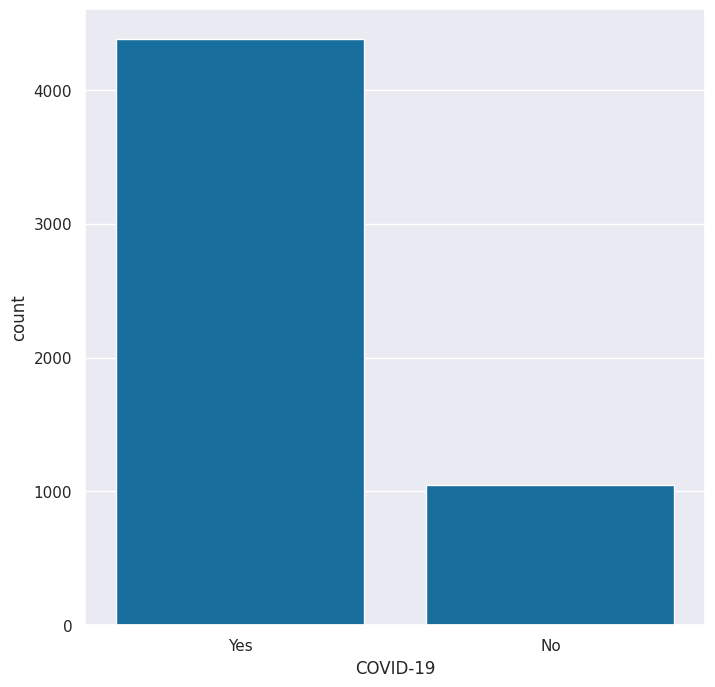

In [ ]:
sns.countplot(x='COVID-19',data=covid)

**conclusion** : Total 1000 people shows no covid symptoms


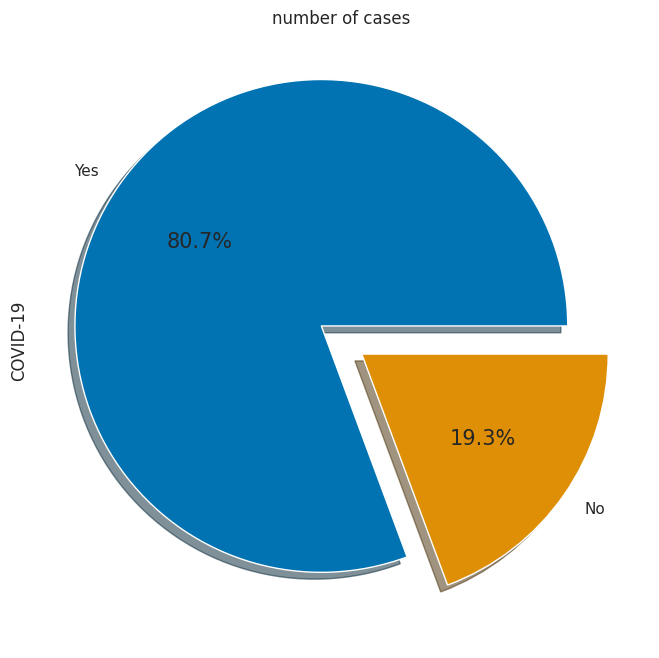

In [ ]:
covid["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

**Conclusion**: 80.7 % values ion the dataset are positive to Covid-19


Breathing Problem

<Axes: xlabel='Breathing Problem', ylabel='count'>

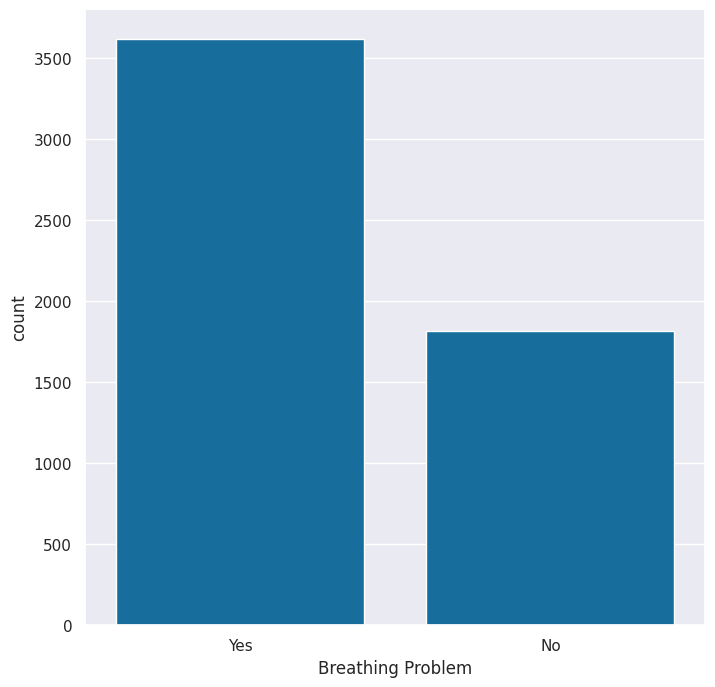

In [ ]:
sns.countplot(x='Breathing Problem',data=covid)

<Axes: xlabel='Breathing Problem', ylabel='count'>

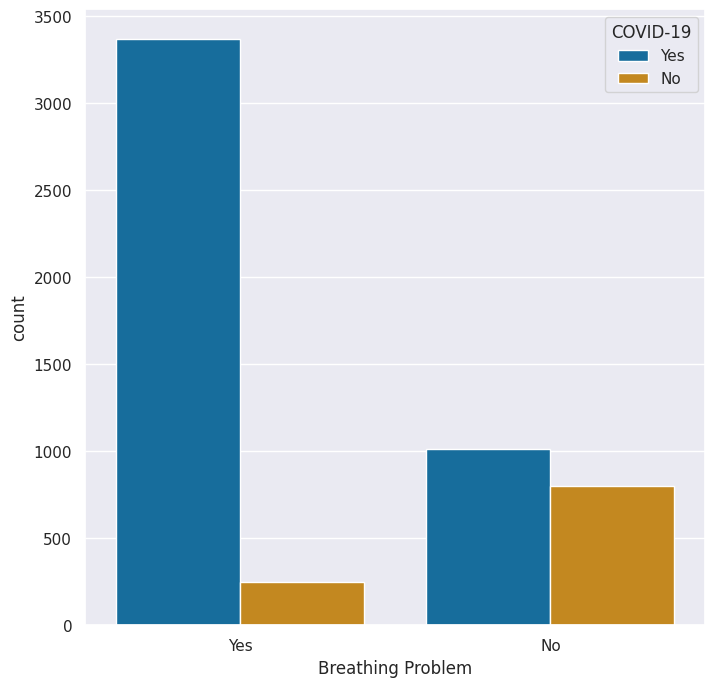

In [ ]:
sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid)

**Conclusion**: People having covid because of breathing problem and some people are still prone to covid-19 despite no breathing problems

Fever

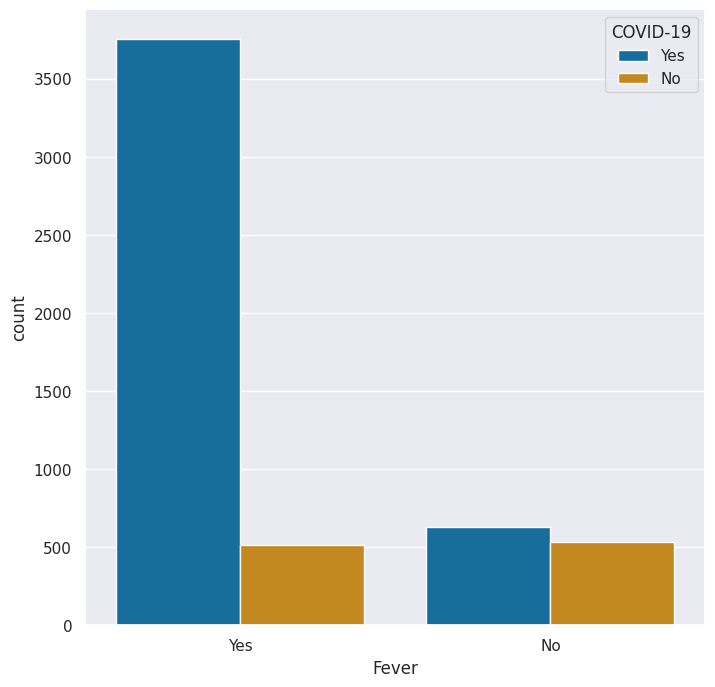

In [ ]:
sns.countplot(x='Fever',hue='COVID-19',data=covid);

**Conclusion** : fever has major contribution in covid-19

Dry Cough

<Axes: xlabel='Dry Cough', ylabel='count'>

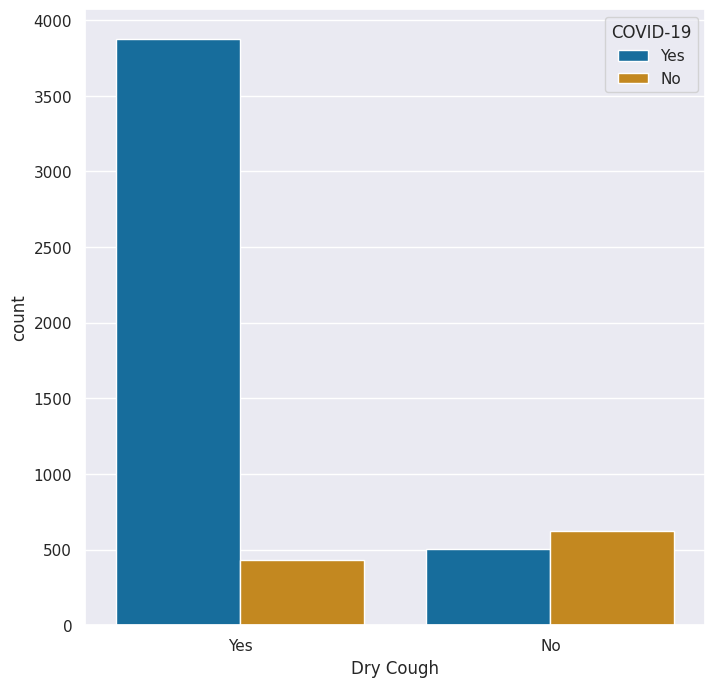

In [ ]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=covid)

**Conclusion** : Covid patients have dry cough.

<Axes: xlabel='Sore throat', ylabel='count'>

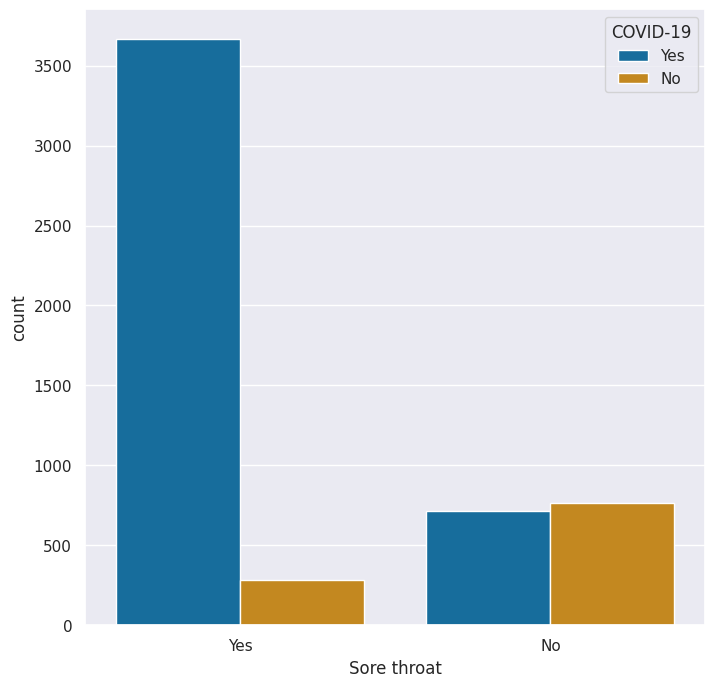

In [ ]:
sns.countplot(x='Sore throat',hue='COVID-19',data=covid)

**Conclusion** : Covid Patients has high amount of sore throat compared to normal people.

## **Feature Transformation :**

In [ ]:
pip install pandas scikit-learn plotly


In [ ]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [ ]:
covid['Breathing Problem']=e.fit_transform(covid['Breathing Problem'])
covid['Fever']=e.fit_transform(covid['Fever'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Running Nose']=e.fit_transform(covid['Running Nose'])
covid['Asthma']=e.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=e.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=e.fit_transform(covid['Headache'])
covid['Heart Disease']=e.fit_transform(covid['Heart Disease'])
covid['Diabetes']=e.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=e.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=e.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=e.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=e.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=e.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=e.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=e.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=e.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=e.fit_transform(covid['COVID-19'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=e.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=e.fit_transform(covid['Fatigue '])

In [ ]:
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
covid.dtypes.value_counts()

int64    21
dtype: int64

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px



# Separate features and target variable
X = covid.drop('COVID-19', axis=1)
y = covid['COVID-19']

# Create a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Plotly Express
fig = px.bar(feature_importance_df, x='Feature', y='Importance', title='Feature Importance',
             labels={'Importance': 'Importance Score'})
fig.show()


**Conclusion** : From the feature importance it is clear that , only factors mentioned below are the major contributors for covid-19

1.Breathing Problem

2.Sore throat

 3.dry cough

 4.abraod travel

 5.attended large gathering

 6.contact with covid patients

## **Data After Transformation**

In [ ]:
covid.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


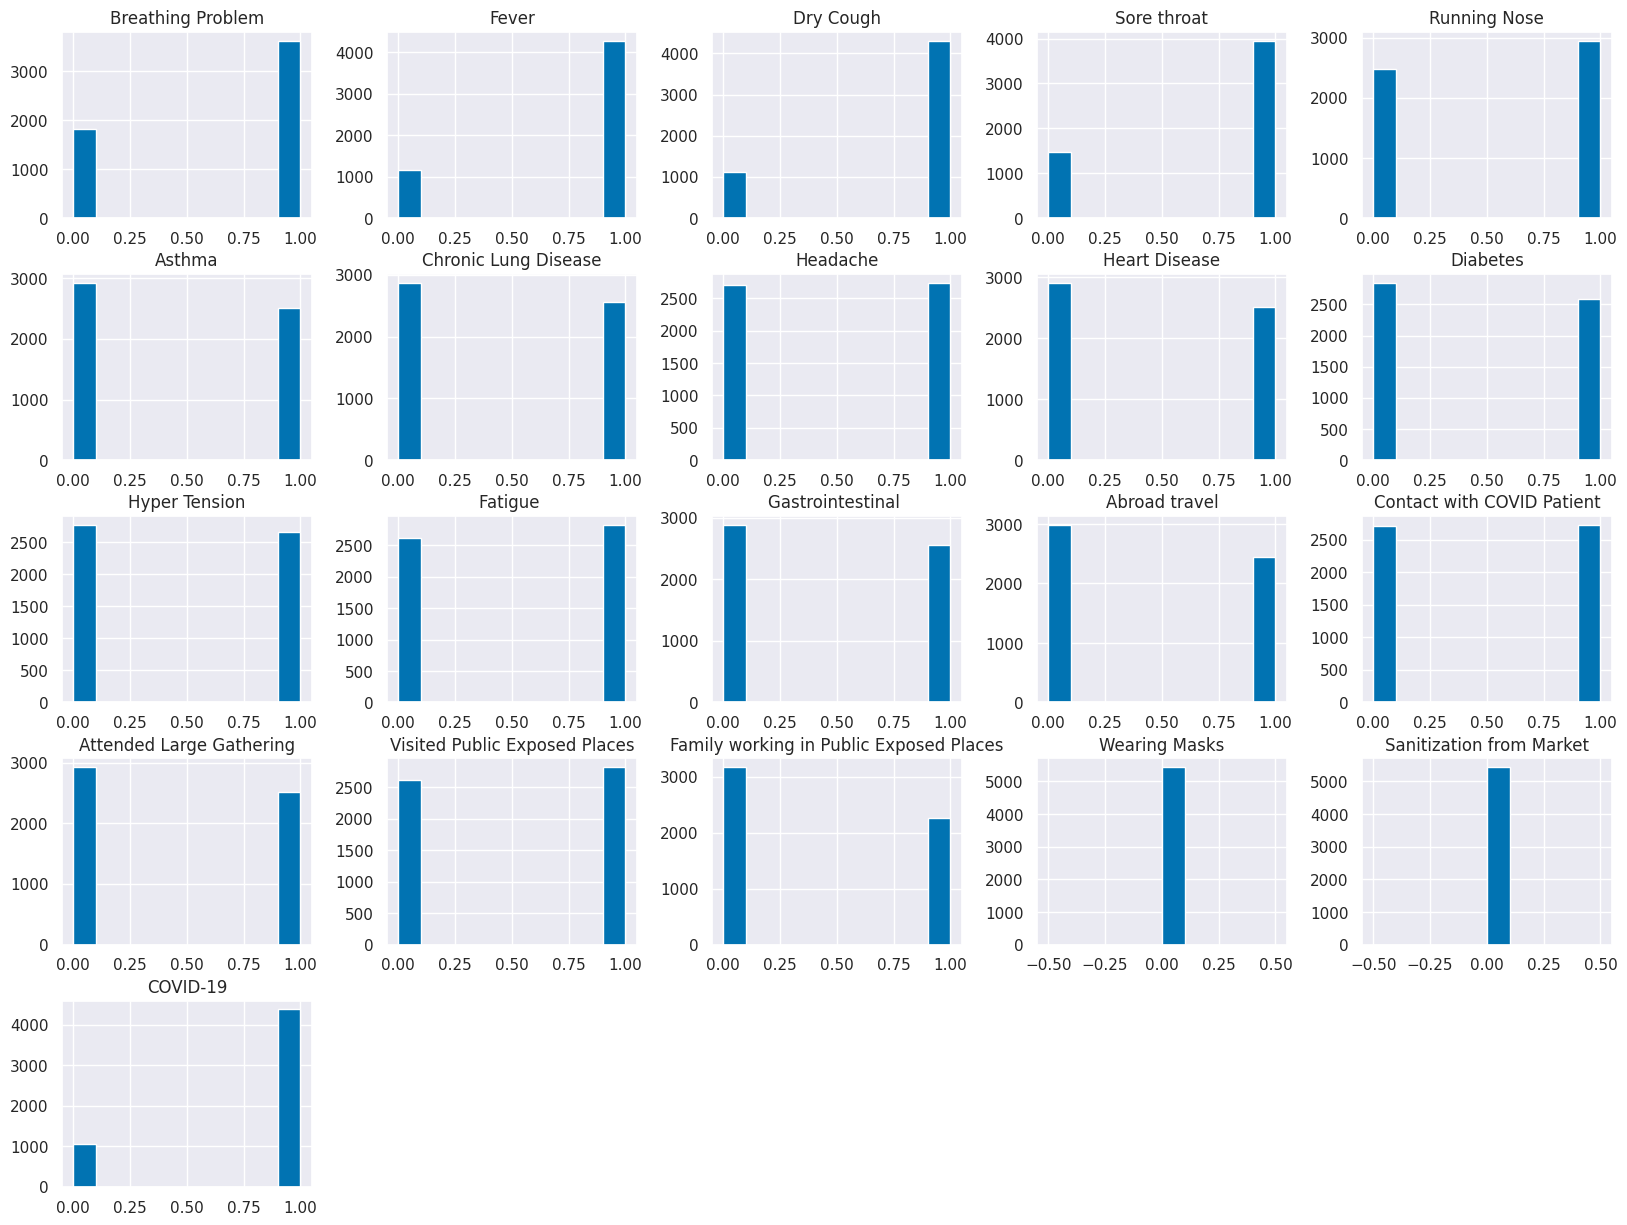

In [ ]:
covid.hist(figsize=(20,15));

## **Corelation Between Features :**

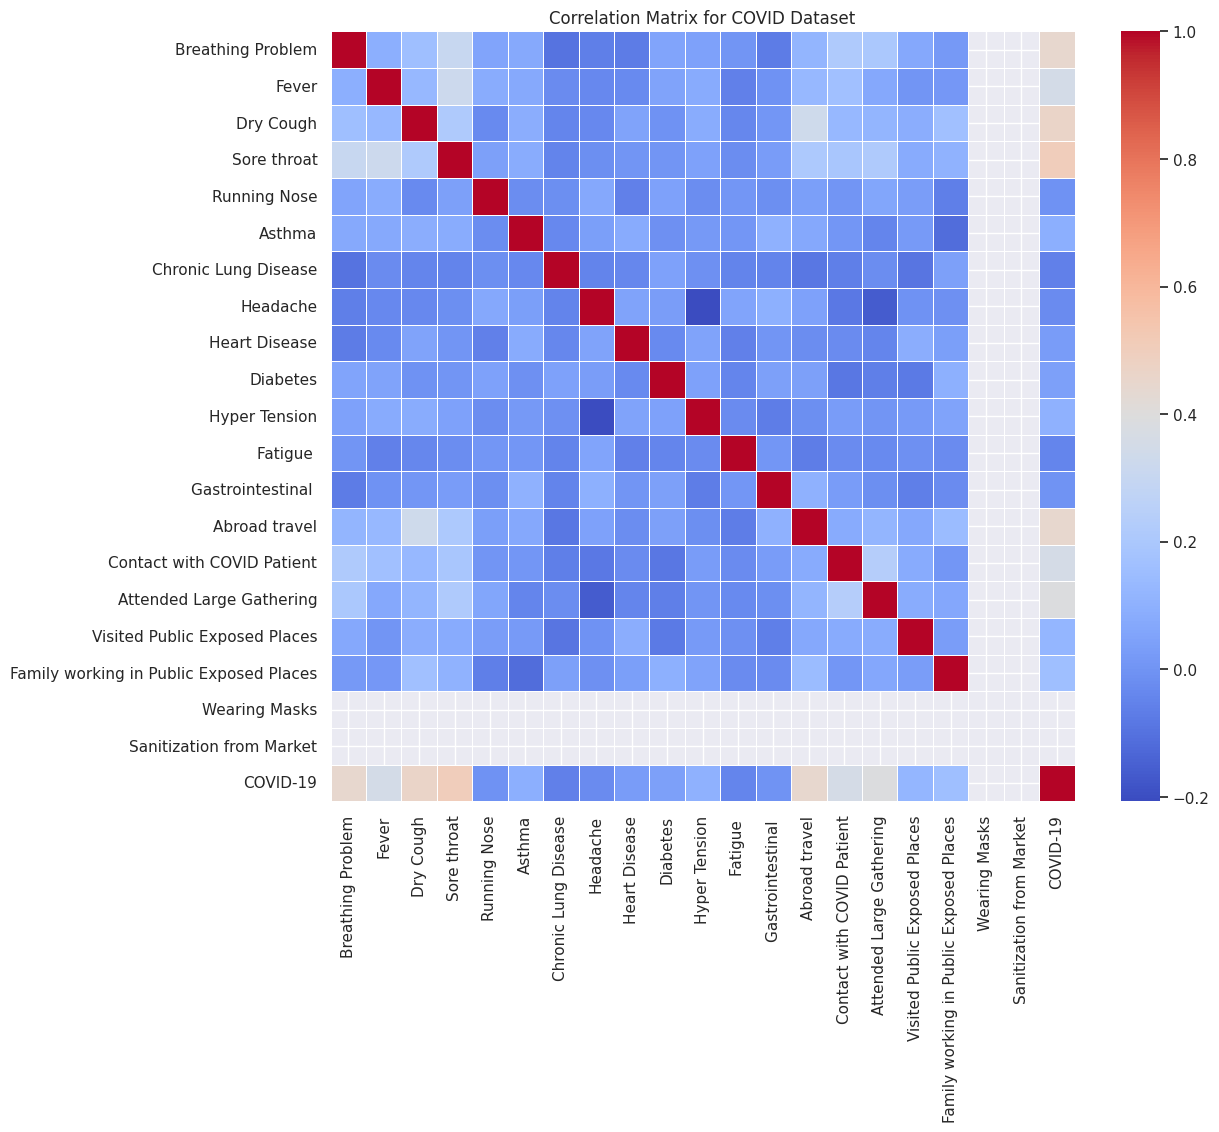

In [ ]:
correlation_matrix = covid.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title('Correlation Matrix for COVID Dataset')
plt.show()

In [ ]:
corr=covid.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


## **Feature Selection :**

feature that we gonna delete:

Running Nose / Asthma /Chronic Lung Disease / Headache / Heart Disease / Diabetes / Fatigue / Gastrointestinal / Wearing Masks / Sanitization from Market

In [ ]:
# Print the columns to check their exact names
print(covid.columns)

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')


In [ ]:
# List of columns to drop
columns_to_drop = ['Running Nose', 'Chronic Lung Disease', 'Headache', 'Heart Disease',
                   'Diabetes', 'Gastrointestinal ', 'Wearing Masks', 'Sanitization from Market',
                   'Asthma', 'Fatigue ']

# Drop columns based on partial matches
covid = covid.loc[:, ~covid.columns.isin(columns_to_drop)]

# Print the remaining columns to verify the changes
print(covid.columns)


Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Hyper Tension', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')


In [ ]:
corr=covid.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.045256,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.079001,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,0.081989,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.042811,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Hyper Tension,0.045256,0.079001,0.081989,0.042811,1.000000,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Abroad travel,0.117795,0.128726,0.331418,0.205986,-0.016382,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.214634,0.164704,0.128330,0.189251,0.027307,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122
Attended Large Gathering,0.200304,0.070490,0.117963,0.216438,0.002911,0.113399,0.234649,1.000000,0.083795,0.063776,0.390145
Visited Public Exposed Places,0.066688,0.002252,0.086176,0.079055,0.019174,0.069609,0.079800,0.083795,1.000000,0.028486,0.119755
Family working in Public Exposed Places,0.018295,0.012102,0.163102,0.104378,0.048152,0.143094,0.006909,0.063776,0.028486,1.000000,0.160208


## **Machine Learning Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
x=covid.drop('COVID-19',axis=1)
y=covid['COVID-19']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

## **Random Forest Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics



# Separate features (X) and target variable (y)
X = covid.drop('COVID-19', axis=1)
y = covid['COVID-19']

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9724011039558418


In [93]:
from sklearn.model_selection import GridSearchCV
import time

# Record the start time
start_time = time.time()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [5,10,100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on training data
grid_search.fit(x_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model found by GridSearchCV
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_rf_classifier.predict(x_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Record the end time
end_time = time.time()

# Calculate the total time taken
execution_time = end_time - start_time

# Print the time taken
print("Execution Time:", execution_time, "seconds")



Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
Accuracy: 0.9751609935602575
Execution Time: 403.2649631500244 seconds


In [ ]:
from sklearn.metrics import classification_report
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       207
           1       0.98      0.99      0.98       880

    accuracy                           0.97      1087
   macro avg       0.96      0.94      0.95      1087
weighted avg       0.97      0.97      0.97      1087



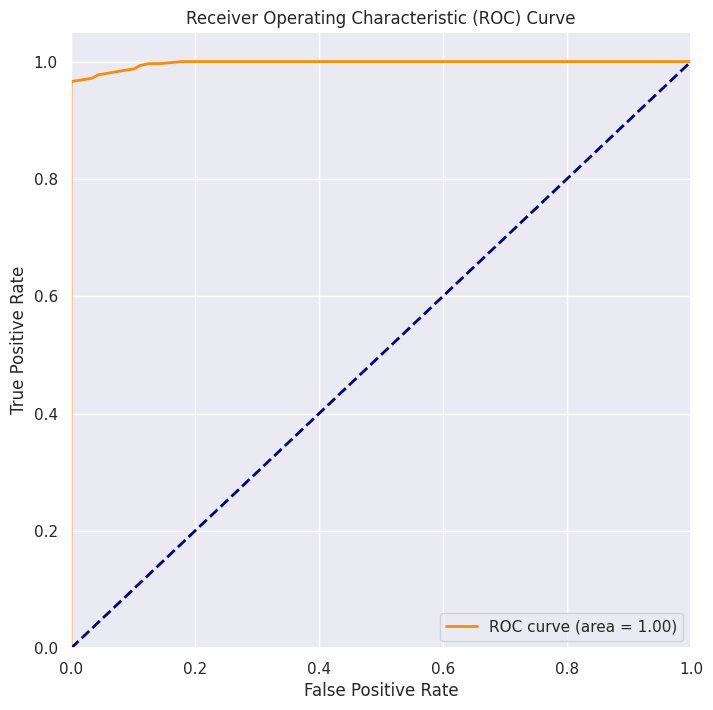

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred_proba = rf_classifier.predict_proba(x_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## **Decision Tree**

**DecisionTreeClassifier**

In [ ]:
from sklearn import tree
t = tree.DecisionTreeClassifier()
t.fit(x_train,y_train)
y_pred = t.predict(x_test)
#Score/Accuracy
acc_decisiontree=t.score(x_test, y_test)*100
acc_decisiontree

97.42410303587856

**Decision Tree using entropy**

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz



# Create a DecisionTreeClassifier with entropy as the criterion
t_entropy = tree.DecisionTreeClassifier(criterion='entropy')

# Fit the model
t_entropy.fit(x_train, y_train)

# Plot the decision tree using Graphviz
dot_data_entropy = tree.export_graphviz(t_entropy, out_file=None,
                                       feature_names=None,
                                       class_names=None,
                                       filled=True, rounded=True, special_characters=True)

graph_entropy = graphviz.Source(dot_data_entropy)
graph_entropy.render("decision_tree_entropy", format="png")  # This will save the tree as a PNG file
graph_entropy.view("decision_tree_entropy")  # This will open the PNG file using the default viewer


'decision_tree_entropy.pdf'

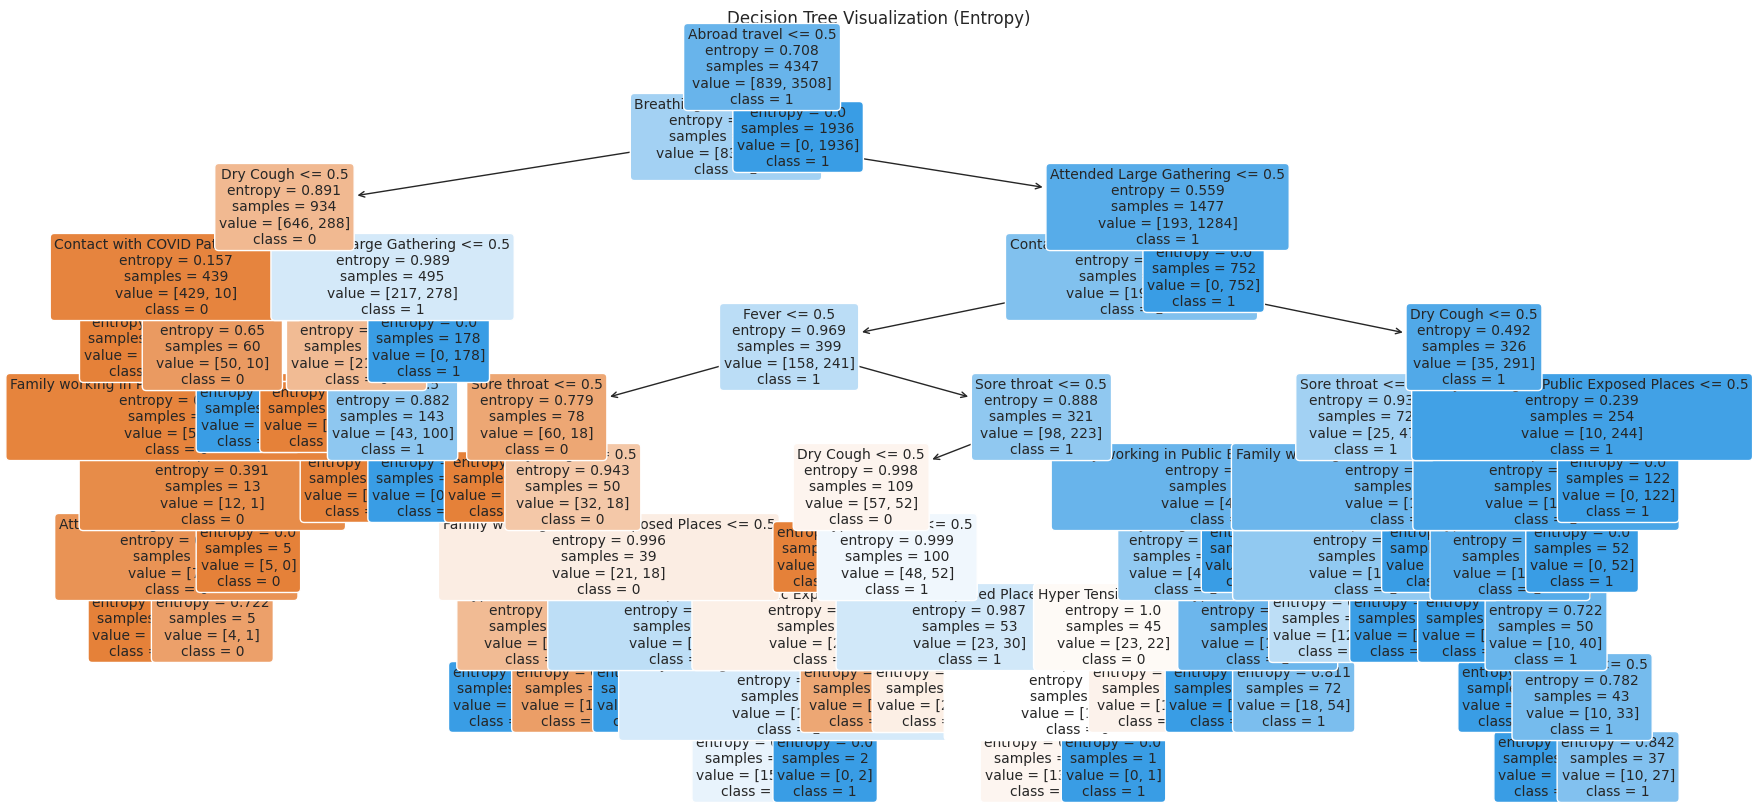

In [ ]:
# Create a DecisionTreeClassifier with entropy as the criterion
t_entropy = tree.DecisionTreeClassifier(criterion='entropy')

# Fit the model
t_entropy.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(t_entropy, filled=True, feature_names=x_train.columns, class_names=['0', '1'], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Entropy)")
plt.show()

**Accuracy,Precision,Recall,F1-score**

In [ ]:
from sklearn.metrics import classification_report
# Fit the model
t_entropy.fit(x_train, y_train)

# Make predictions on the test set
y_pred_entropy = t_entropy.predict(x_test)

# Print the classification report
print("Classification Report for Decision Tree (Entropy):")
print(classification_report(y_test, y_pred_entropy))

Classification Report for Decision Tree (Entropy):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       212
           1       0.98      0.99      0.98       875

    accuracy                           0.97      1087
   macro avg       0.96      0.96      0.96      1087
weighted avg       0.97      0.97      0.97      1087



presort=true and maxdepth=3

In [ ]:
# Create a DecisionTreeClassifier with entropy as the criterion and max_depth=3
t_entropy_params = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Fit the model
t_entropy_params.fit(x_train, y_train)

# Make predictions on the test set
y_pred_entropy_params = t_entropy_params.predict(x_test)

# Print the classification report
print("Classification Report for Decision Tree (Entropy, max_depth=3):")
print(classification_report(y_test, y_pred_entropy_params))

Classification Report for Decision Tree (Entropy, max_depth=3):
              precision    recall  f1-score   support

           0       0.93      0.45      0.61       212
           1       0.88      0.99      0.93       875

    accuracy                           0.89      1087
   macro avg       0.91      0.72      0.77      1087
weighted avg       0.89      0.89      0.87      1087



depth=2,3,4

In [ ]:
# Create a DecisionTreeClassifier with entropy as the criterion and max_depth=3
t_entropy_params = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Fit the model
t_entropy_params.fit(x_train, y_train)

# Make predictions on the test set
y_pred_entropy_params = t_entropy_params.predict(x_test)

# Print the classification report
print("Classification Report for Decision Tree (Entropy, max_depth=2):")
print(classification_report(y_test, y_pred_entropy_params))

Classification Report for Decision Tree (Entropy, max_depth=2):
              precision    recall  f1-score   support

           0       0.93      0.45      0.61       212
           1       0.88      0.99      0.93       875

    accuracy                           0.89      1087
   macro avg       0.91      0.72      0.77      1087
weighted avg       0.89      0.89      0.87      1087



In [ ]:
# Create a DecisionTreeClassifier with entropy as the criterion and max_depth=3
t_entropy_params = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Fit the model
t_entropy_params.fit(x_train, y_train)

# Make predictions on the test set
y_pred_entropy_params = t_entropy_params.predict(x_test)

# Print the classification report
print("Classification Report for Decision Tree (Entropy, max_depth=4):")
print(classification_report(y_test, y_pred_entropy_params))

Classification Report for Decision Tree (Entropy, max_depth=4):
              precision    recall  f1-score   support

           0       0.93      0.45      0.61       212
           1       0.88      0.99      0.93       875

    accuracy                           0.89      1087
   macro avg       0.91      0.72      0.77      1087
weighted avg       0.89      0.89      0.87      1087



**Decision Tree Using Gini index**

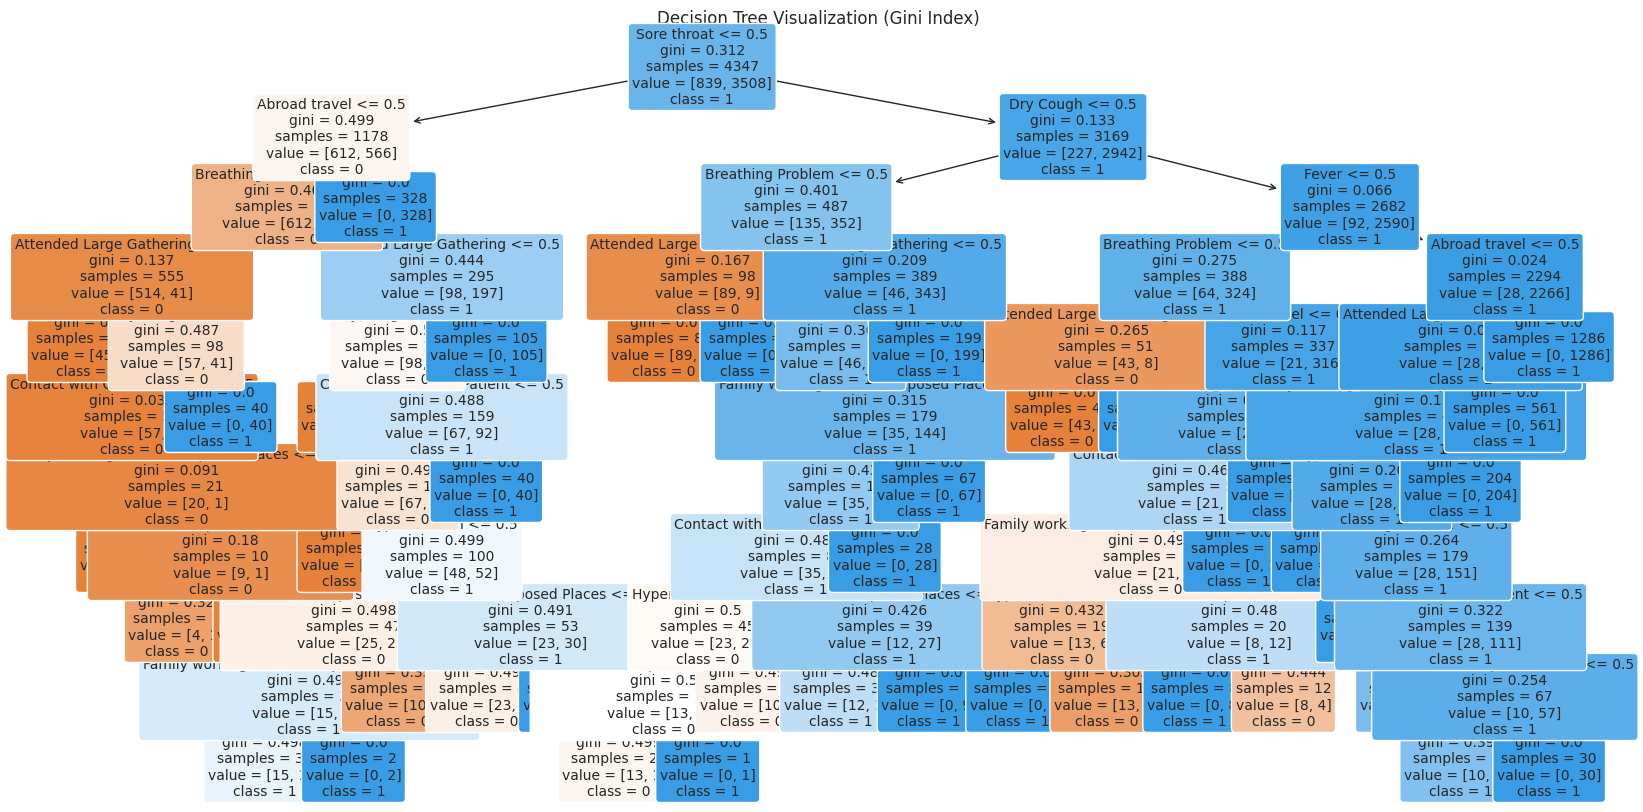

In [ ]:
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are your training and testing data
# Replace them with your actual data

# Create a DecisionTreeClassifier with Gini index as the criterion
t_gini = tree.DecisionTreeClassifier(criterion='gini')

# Fit the model
t_gini.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(t_gini, filled=True, feature_names=x_train.columns, class_names=['0', '1'], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Gini Index)")
plt.show()




**Accuracy,Precision,Recall,F1-score**

In [ ]:
# Make predictions on the test set
y_pred_gini = t_gini.predict(x_test)

# Print the classification report
print("Classification Report for Decision Tree (Gini Index):")
print(classification_report(y_test, y_pred_gini))

Classification Report for Decision Tree (Gini Index):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       212
           1       0.98      0.99      0.98       875

    accuracy                           0.97      1087
   macro avg       0.96      0.96      0.96      1087
weighted avg       0.97      0.97      0.97      1087



presort=true and maxdepth=3

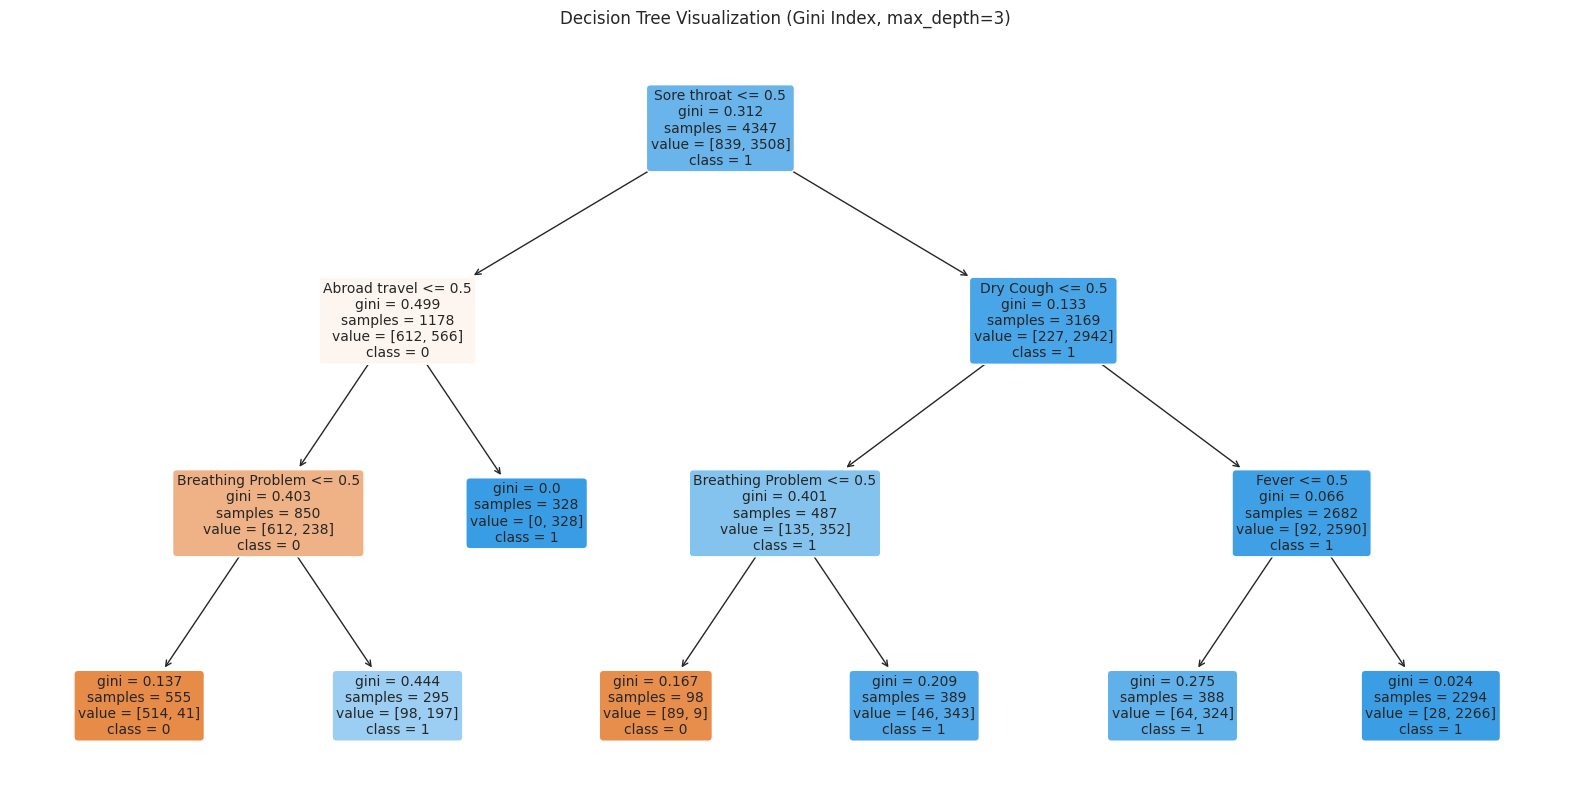

Classification Report for Decision Tree (Gini Index, max_depth=3):
              precision    recall  f1-score   support

           0       0.89      0.67      0.77       212
           1       0.93      0.98      0.95       875

    accuracy                           0.92      1087
   macro avg       0.91      0.83      0.86      1087
weighted avg       0.92      0.92      0.92      1087



In [ ]:


# Create a DecisionTreeClassifier with Gini index as the criterion and max_depth=3
t_gini_params = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

# Fit the model
t_gini_params.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(t_gini_params, filled=True, feature_names=x_train.columns, class_names=['0', '1'], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Gini Index, max_depth=3)")
plt.show()

# Make predictions on the test set
y_pred_gini_params = t_gini_params.predict(x_test)

# Print the classification report
print("Classification Report for Decision Tree (Gini Index, max_depth=3):")
print(classification_report(y_test, y_pred_gini_params))


depth=2,3,4

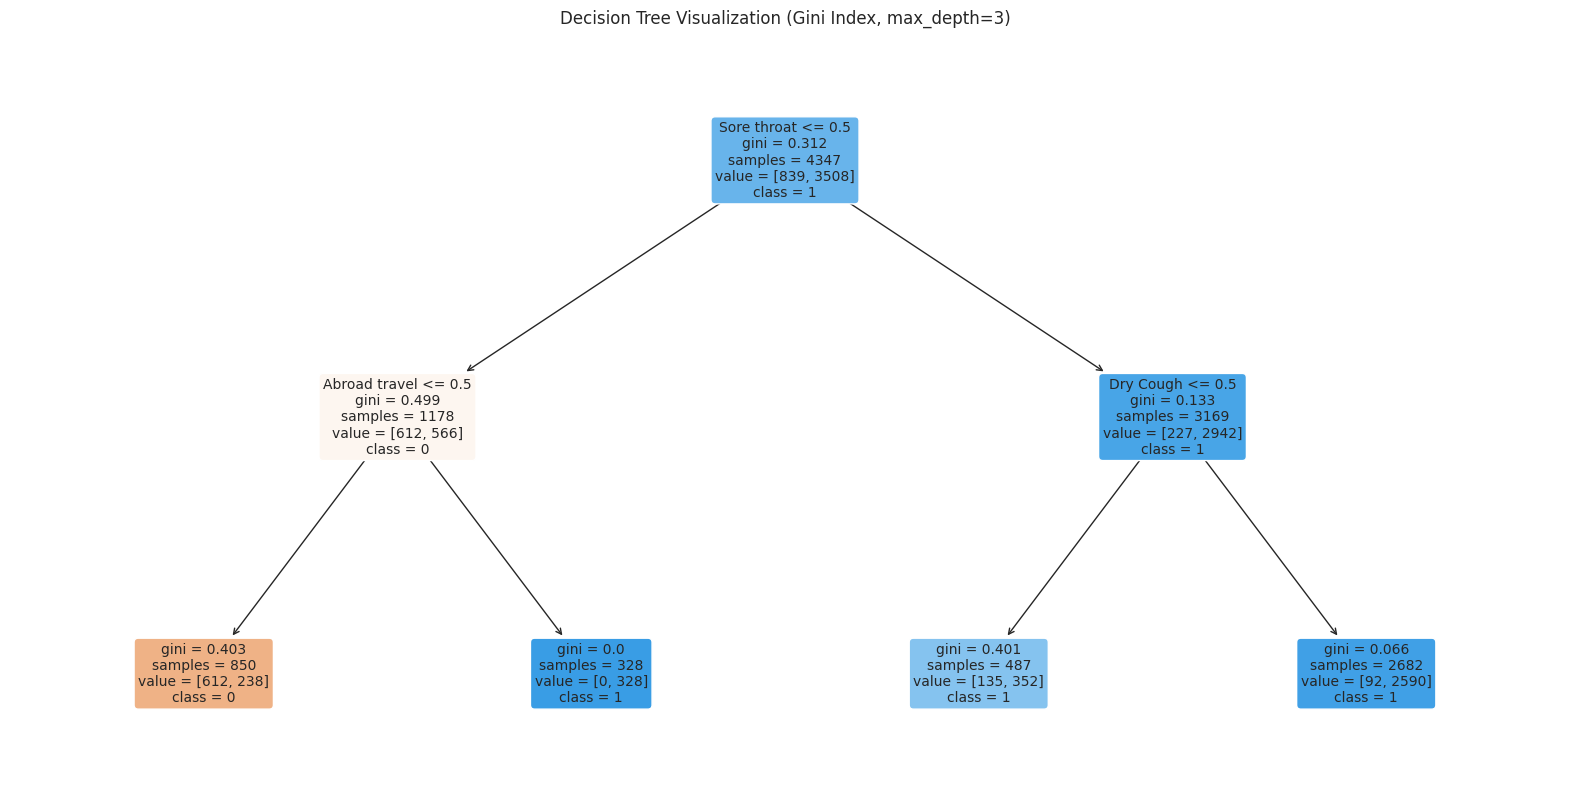

Classification Report for Decision Tree (Gini Index, max_depth=2):
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       212
           1       0.93      0.94      0.94       875

    accuracy                           0.90      1087
   macro avg       0.83      0.83      0.83      1087
weighted avg       0.90      0.90      0.90      1087



In [ ]:


# Create a DecisionTreeClassifier with Gini index as the criterion and max_depth=3
t_gini_params = tree.DecisionTreeClassifier(criterion='gini', max_depth=2)

# Fit the model
t_gini_params.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(t_gini_params, filled=True, feature_names=x_train.columns, class_names=['0', '1'], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Gini Index, max_depth=3)")
plt.show()

# Make predictions on the test set
y_pred_gini_params = t_gini_params.predict(x_test)

# Print the classification report
print("Classification Report for Decision Tree (Gini Index, max_depth=2):")
print(classification_report(y_test, y_pred_gini_params))


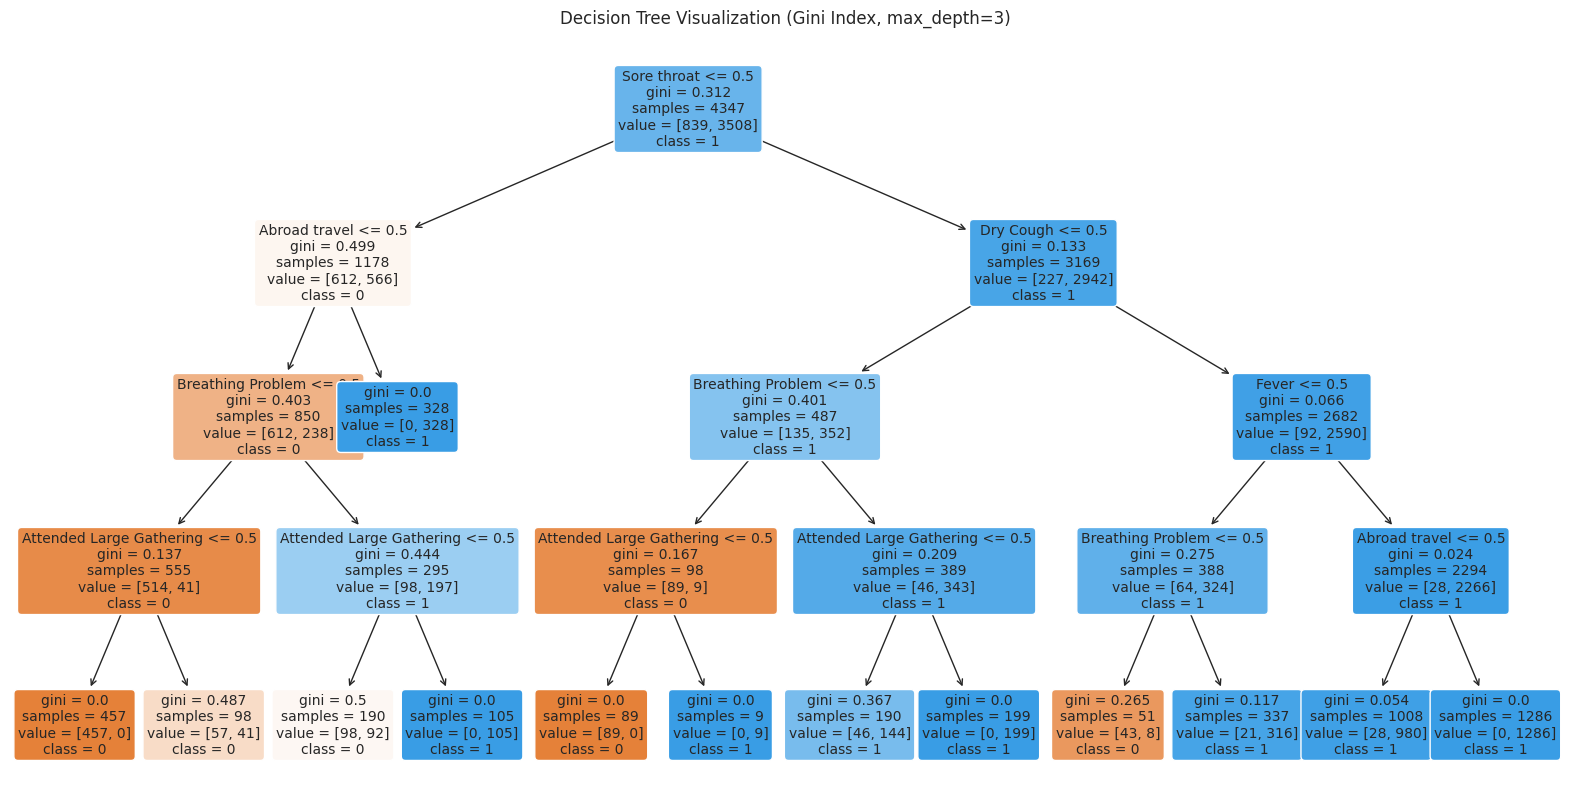

Classification Report for Decision Tree (Gini Index, max_depth=3):
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       212
           1       0.97      0.96      0.96       875

    accuracy                           0.94      1087
   macro avg       0.91      0.91      0.91      1087
weighted avg       0.94      0.94      0.94      1087



In [ ]:


# Create a DecisionTreeClassifier with Gini index as the criterion and max_depth=3
t_gini_params = tree.DecisionTreeClassifier(criterion='gini', max_depth=4)

# Fit the model
t_gini_params.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(t_gini_params, filled=True, feature_names=x_train.columns, class_names=['0', '1'], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Gini Index, max_depth=3)")
plt.show()

# Make predictions on the test set
y_pred_gini_params = t_gini_params.predict(x_test)

# Print the classification report
print("Classification Report for Decision Tree (Gini Index, max_depth=3):")
print(classification_report(y_test, y_pred_gini_params))


**Training and Testing Error :**

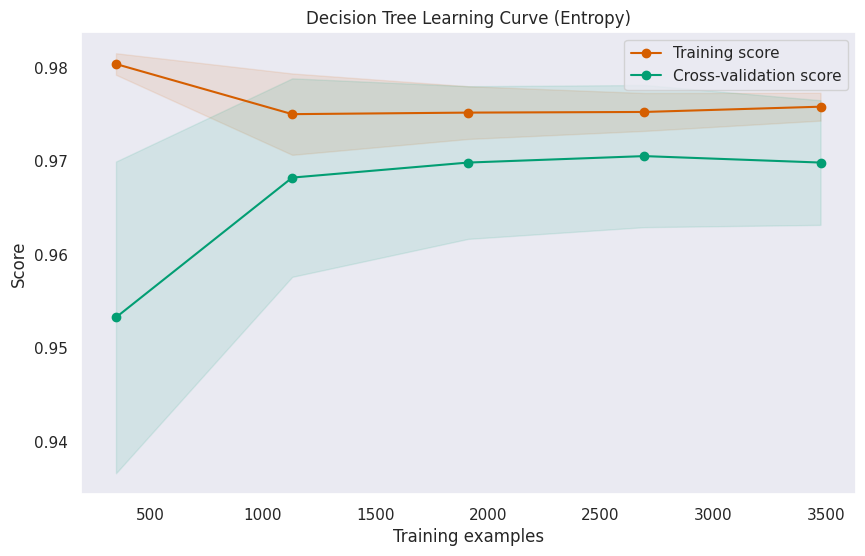

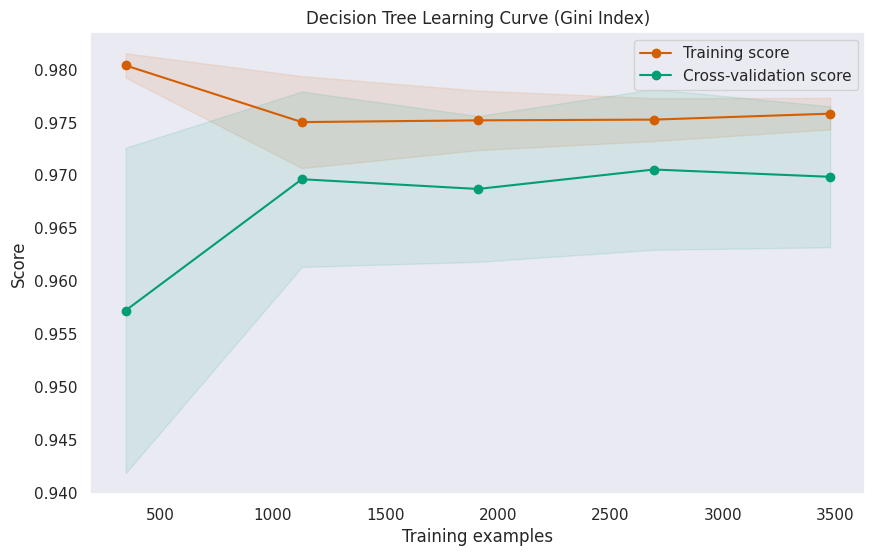

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


# Create DecisionTreeClassifiers with entropy and Gini index as the criterion
t_entropy = tree.DecisionTreeClassifier(criterion='entropy')
t_gini = tree.DecisionTreeClassifier(criterion='gini')

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for both entropy and Gini index
plot_learning_curve(t_entropy, "Decision Tree Learning Curve (Entropy)", x_train, y_train, cv=5)
plot_learning_curve(t_gini, "Decision Tree Learning Curve (Gini Index)", x_train, y_train, cv=5)

plt.show()


## **Decision Tree vs Random Forest**

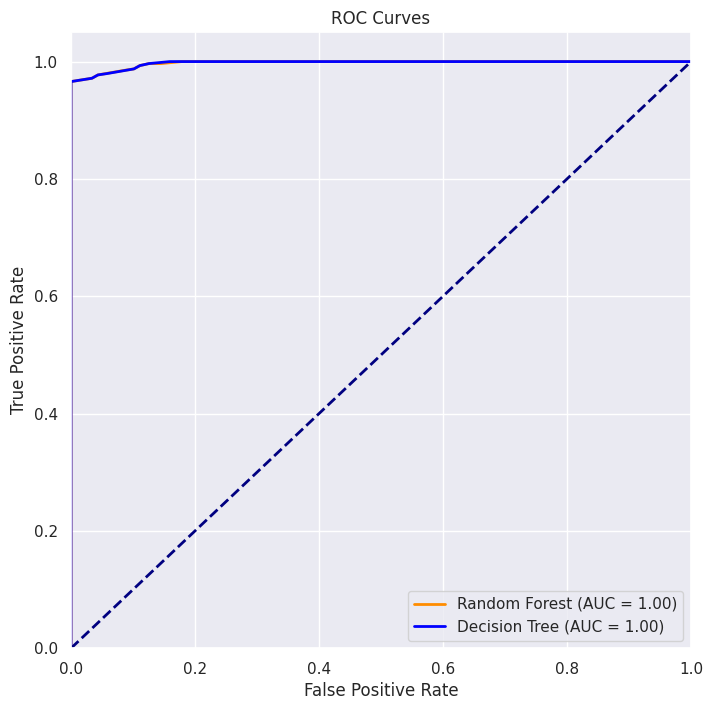

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Predict probabilities for both models
y_pred_proba_rf = rf_classifier.predict_proba(x_test)[:, 1]
y_pred_proba_dt = t.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


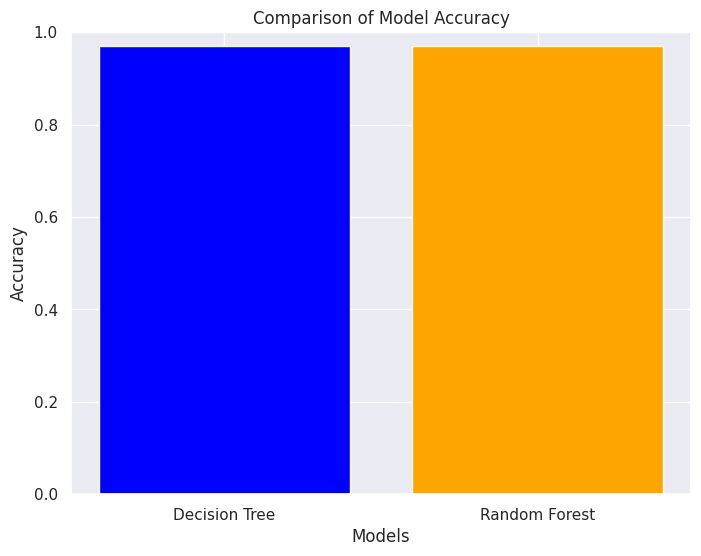

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values from the classification reports
decision_tree_accuracy = 0.97
random_forest_accuracy = 0.97

# Define labels for the bar graph
labels = ['Decision Tree', 'Random Forest']

# Accuracy values for both models
accuracies = [decision_tree_accuracy, random_forest_accuracy]

# Plot bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 since accuracy ranges from 0 to 1
plt.show()


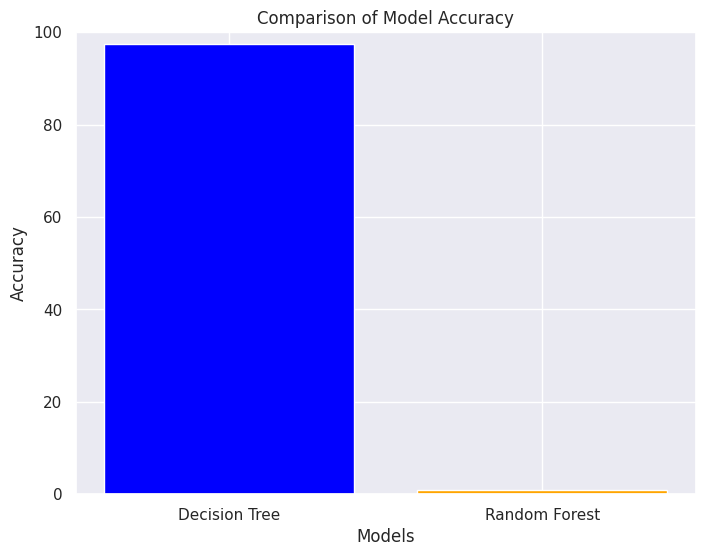

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'acc_decisiontree' and 'accuracy' are the accuracies of Decision Tree and Random Forest respectively

# Define labels and accuracy values
models = ['Decision Tree', 'Random Forest']
accuracies = [acc_decisiontree, accuracy]

# Plot bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100
plt.show()

## **Other ML models**

**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#Score/Accuracy
acc_logreg=model.score(x_test, y_test)*100
acc_logreg

96.78012879484821

**RandomForestRegressor**

In [ ]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
#Fit
model.fit(x_train, y_train)
#Score/Accuracy
acc_randomforest=model.score(x_test, y_test)*100
acc_randomforest

89.41728747884157

**GradientBoostingRegressor**

In [ ]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(x_train, y_train)
acc_gbk=GBR.score(x_test, y_test)*100
acc_gbk

85.79817859754654

**KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#Score/Accuracy
acc_knn=knn.score(x_test, y_test)*100
acc_knn

96.8721251149954

**naive_bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
#Score/Accuracy
acc_gaussian= model.score(x_test, y_test)*100
acc_gaussian

77.64489420423183

# **Comparative Analysis**

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [acc_knn, acc_logreg,
              acc_randomforest, acc_gaussian, acc_decisiontree,
               acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,97.424103
0,KNN,96.872125
1,Logistic Regression,96.780129
2,Random Forest,89.417287
5,Gradient Boosting Classifier,85.798179
3,Naive Bayes,77.644894


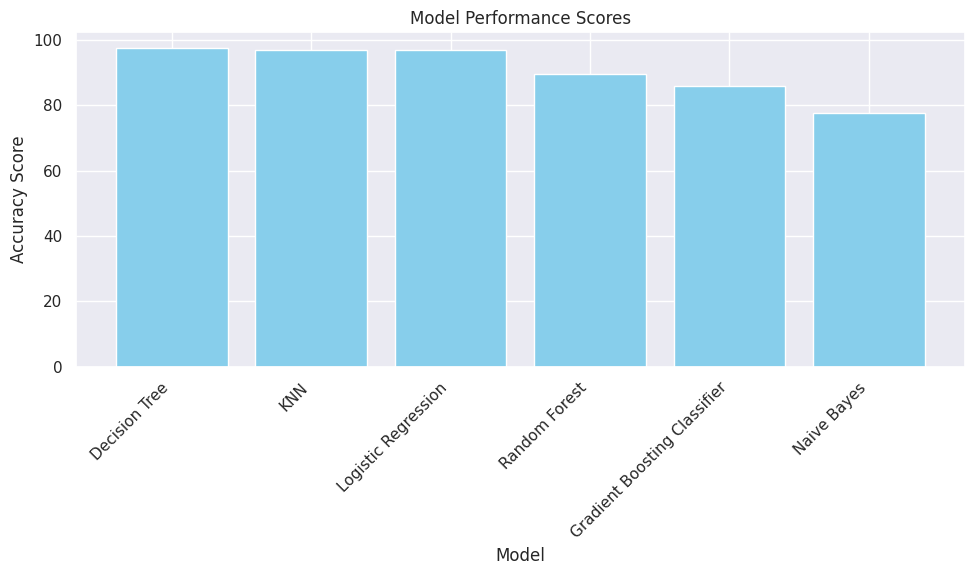

In [ ]:

models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [acc_knn, acc_logreg, acc_randomforest, acc_gaussian, acc_decisiontree, acc_gbk]
})

# Sort the DataFrame by score in descending order
models = models.sort_values(by='Score', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models['Model'], models['Score'], color='skyblue')
plt.title('Model Performance Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Conclusion**:

1.Decision trees (Gini index and entropy) are interpretable and can handle non-linear relationships but may suffer from overfitting.

2.**Gini Index:**

Measures the impurity of a node by calculating the probability of a randomly chosen element being incorrectly classified.

Generally faster to compute compared to entropy.

Tends to be slightly biased towards larger partitions.

3.**Entropy:**

Measures the information gain by calculating the average surprise of a randomly chosen element's classification.

Can be computationally more expensive than Gini index.

Tends to create more balanced trees.

**4.Performance of decision tree on increasing depth :**

*4.1 Training Accuracy:*

Training accuracy may increase as the model becomes more complex and can fit the training data more closely.

However, there is a risk of overfitting, where the model memorizes the training data but fails to generalize well to new, unseen data.

*4.2 Testing Accuracy:*

Initially, testing accuracy may improve as the model captures more patterns in the training data.

 However, after a certain depth, the model may start to overfit, leading to a decrease in testing accuracy as it becomes less capable of generalizing to new data.

*4.3 Precision and Recall:*

Precision and recall may initially improve as the model becomes better at distinguishing between different classes.

 However, as the tree becomes deeper, it may capture noise and outliers in the training data, leading to a decrease in precision and recall.

*4.4 F1 Score:*

F1 score is the harmonic mean of precision and recall.

 It is useful for finding a balance between precision and recall.

 The F1 score may exhibit an initial improvement and then potentially decrease as the model overfits

 To solve this issues it is necessary to perform Hyperparameter Tunning.